Text(0,0.5,'Right Centre Back Score')

<Figure size 1080x2304 with 0 Axes>

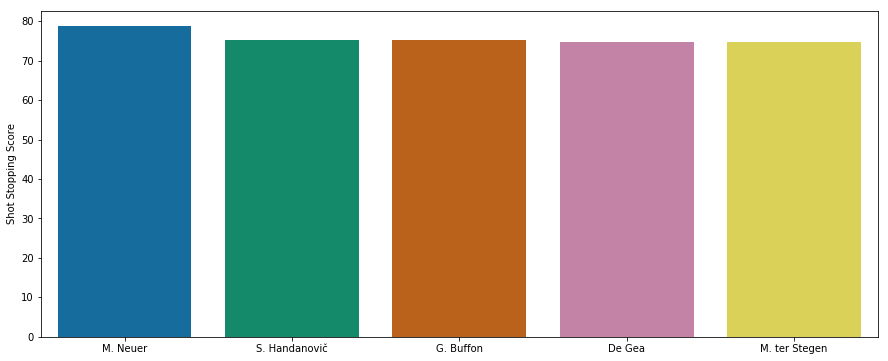

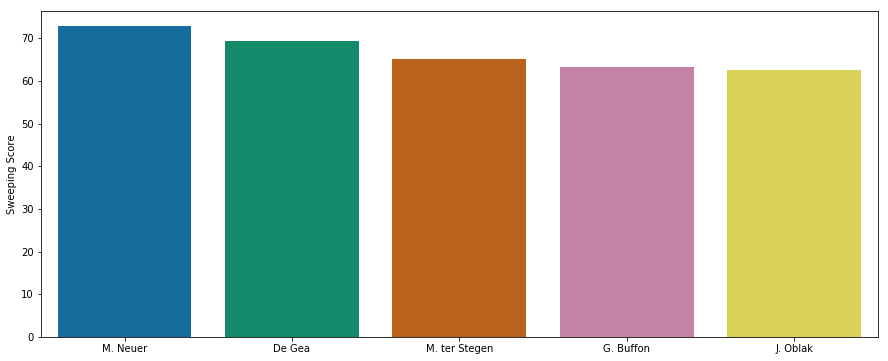

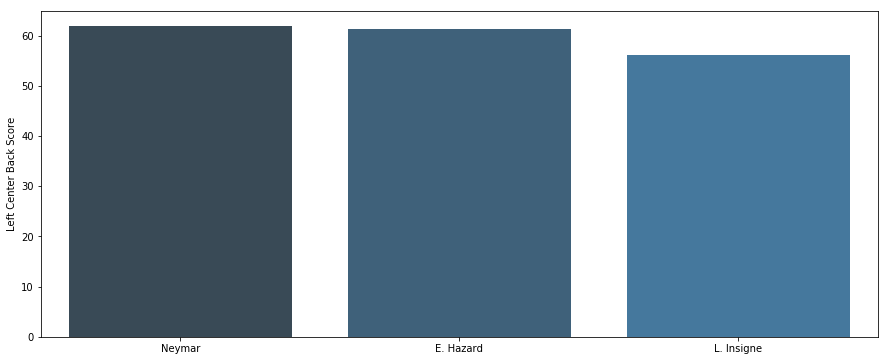

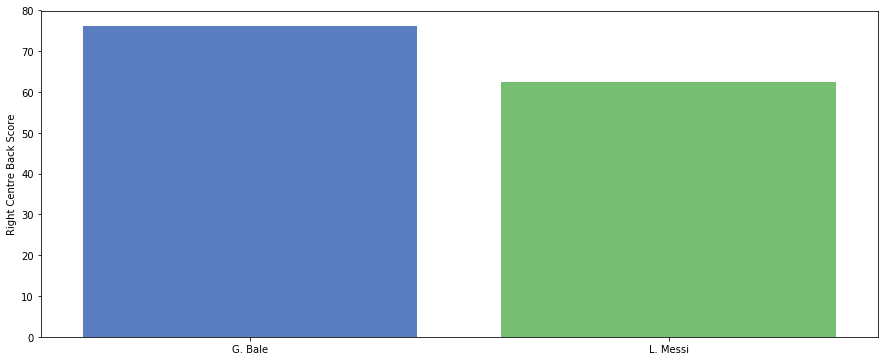

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

df = pd.read_csv("Data.csv")

df.head(7)

plt.figure(figsize=(15,32))

# find best defenders
#weights
a = 1
b = 1
c = 2
d = 3

#GoalKeeping Characterstics

df['gk_Shot_Stopper'] = (b*df.Reactions.astype(float) + b*df.Composure.astype(float) + a*df.Strength.astype(float) +
                         c*df.Jumping.astype(float) + b*df.GK_positioning.astype(float) + c*df.GK_diving.astype(float) +
                         d*df.GK_reflexes.astype(float) + b*df.GK_handling.astype(float))/(2*a + 4*b + 2*c + 1*d)

df['gk_Sweeper'] = (b*df.Reactions.astype(float) + b*df.Composure.astype(float) + a*df.Shortpassing.astype(float) +
                    a*df.Longpassing.astype(float) + b*df.Jumping.astype(float) + b*df.GK_positioning.astype(float) +
                    b*df.GK_diving.astype(float) + d*df.GK_reflexes.astype(float) + b*df.GK_handling.astype(float) +
                    d*df.GK_kicking.astype(float) + c*df.Vision.astype(float))/(2*a + 4*b + 3*c + 2*d)

plt.figure(figsize=(15,6))

# Generate sequential data and plot
#  BEST GOALKEEPER
# Based on the shot-stopper:
sd = df.sort_values('gk_Shot_Stopper', ascending=False)[:5]
x1 = np.array((sd['Name']).astype(list))
y1 = np.array((sd['gk_Shot_Stopper']).astype(list))
sns.barplot(x1, y1, palette= "colorblind")
plt.ylabel("Shot Stopping Score")

# Based on the sweeping score
plt.figure(figsize=(15,6))
sd = df.sort_values('gk_Sweeper', ascending=False)[:5]
x2 = np.array((sd['Name']).astype(list))
y2 = np.array((sd['gk_Sweeper']).astype(list))
sns.barplot(x2, y2, palette= "colorblind")
plt.ylabel("Sweeping Score")

# BEST DEFENDERS
#Choosing Defenders
df['df_centre_backs'] = ( d*df.Reactions.astype(float) + c*df.Interceptions.astype(float) +
                          d*df.Sliding_Tackle.astype(float) + d*df.Standing_Tackle.astype(float) +
                          b*df.Vision.astype(float)+ b*df.Composure.astype(float) + b*df.Crossing.astype(float) +
                          a*df.Shortpassing.astype(float) + b*df.Longpassing.astype(float) + c*df.Acceleration.astype(float) +
                          b*df.Speed.astype(float) + d*df.Stamina.astype(float) + d*df.Jumping.astype(float) +
                          d*df.Heading.astype(float) + b*df.Long_Shots.astype(float) + d*df.Marking.astype(float) +
                          c*df.Aggression.astype(float))/(6*b + 3*c + 7*d)

df['df_wb_Wing_Backs'] = (b*df.Ball_Control.astype(float) + a*df.Dribbling.astype(float) + a*df.Marking.astype(float) +
                          d*df.Sliding_Tackle.astype(float) + d*df.Standing_Tackle.astype(float) +
                          a*df.Positioning.astype(float) + c*df.Vision.astype(float) + c*df.Crossing.astype(float)+
                          b*df.Shortpassing.astype(float) + c*df.Longpassing.astype(float) +
                          d*df.Acceleration.astype(float) + d*df.Speed.astype(float) + c*df.Stamina.astype(float) +
                          a*df.Finishing.astype(float))/(4*a + 2*b + 4*c + 4*d)

#Left central defenders
plt.figure(figsize=(15,6))
sd = df[(df['Club_Position'] == 'LW')].sort_values('df_centre_backs', ascending=False)[:5]
x2 = np.array((sd['Name']).astype(list))
y2 = np.array((sd['df_centre_backs']).astype(list))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("Left Center Back Score")


#Right central defenders
plt.figure(figsize=(15,6))
sd = df[(df['Club_Position'] == 'RW')].sort_values('df_centre_backs', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['df_centre_backs']))
sns.barplot(x2, y2, palette=sns.color_palette("muted"))
plt.ylabel("Right Centre Back Score")